In [0]:
# execute a code below to increase size of jupyter notebook code cell
from IPython.core.display import display, HTML
percent = 92
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>div.cell{width:" + str( percent ) + "%;margin-left:" + str ( 100 - percent ) + "%;margin-right:auto;}</style>" ) )

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2

import random
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import gc
from keras.models import model_from_json
from tensorflow.keras.layers import ZeroPadding2D,MaxPooling2D,  Dropout, Dense, Flatten,Input,Activation,Conv2D,Convolution2D
from tensorflow.keras.models import Model

Using TensorFlow backend.


In [0]:
from sklearn.metrics import roc_curve, auc,confusion_matrix

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')
!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
gdrive	sample_data


In [4]:

%cd gdrive/My Drive
csv_file=pd.read_csv('./Colab Notebooks/labeled_shuffled.csv')
print(csv_file.tail())

/content/gdrive/My Drive
      Unnamed: 0  image_id  face_type  sex
1995         416   417.jpg          0    1
1996        1845  1846.jpg          3    1
1997        1647  1648.jpg          3    0
1998         904   905.jpg          1    1
1999        1465  1466.jpg          2    1


In [0]:

img =cv2.imread('./vgg_face/'+csv_file['image_id'].values[0])
print(img.shape)
print(len(csv_file))

AttributeError: ignored

In [5]:
X = np.load('./Colab Notebooks/X.npy')
Y_faceType = np.load('./Colab Notebooks/Y_facetype.npy')
Y_sex = np.load('./Colab Notebooks/Y_sex.npy')
print(X[:10])
X_train, X_test, Y_train_facetype,Y_test_facetype, Y_train_sex,Y_test_sex = X[:1600], X[1600:],Y_faceType[:1600],Y_faceType[1600:],Y_sex[:1600],Y_sex[1600:]
print(Y_train_facetype[0])
print(Y_faceType[:10])
print(Y_sex[:10])
print(X_test.shape)

[[[[0.6484375  0.7109375  0.76171875]
   [0.6484375  0.7109375  0.76171875]
   [0.65234375 0.71484375 0.765625  ]
   ...
   [0.72265625 0.7734375  0.828125  ]
   [0.72265625 0.7734375  0.828125  ]
   [0.72265625 0.7734375  0.828125  ]]

  [[0.6484375  0.7109375  0.76171875]
   [0.6484375  0.7109375  0.76171875]
   [0.65234375 0.71484375 0.765625  ]
   ...
   [0.7265625  0.77734375 0.83203125]
   [0.7265625  0.77734375 0.83203125]
   [0.7265625  0.77734375 0.83203125]]

  [[0.6484375  0.7109375  0.76171875]
   [0.6484375  0.7109375  0.76171875]
   [0.65234375 0.71484375 0.765625  ]
   ...
   [0.7265625  0.77734375 0.83203125]
   [0.7265625  0.77734375 0.83203125]
   [0.7265625  0.77734375 0.83203125]]

  ...

  [[0.62109375 0.68359375 0.74609375]
   [0.62109375 0.68359375 0.74609375]
   [0.625      0.6875     0.75      ]
   ...
   [0.7421875  0.796875   0.8671875 ]
   [0.7421875  0.796875   0.8671875 ]
   [0.7421875  0.796875   0.8671875 ]]

  [[0.6171875  0.6796875  0.7421875 ]
   [0.6

In [0]:
Race_X = np.load('./Colab Notebooks/Race_X.npy')
Race_Y_faceType = np.load('./Colab Notebooks/Race_Y_faceType.npy')
Race_Y_sex = np.load('./Colab Notebooks/Race_Y_sex.npy')

print(Race_X.shape)

(2000, 224, 224, 3)


In [0]:
print(Race_Y_faceType[:1000])
print(Race_Y_sex[:1000])

[0 0 0 3 0 2 0 1 3 3 1 1 0 1 3 3 0 1 3 1 2 1 1 0 2 0 1 3 0 2 1 1 1 3 0 3 0
 3 3 2 1 2 2 3 2 3 0 1 2 3 3 3 0 1 3 3 0 1 3 2 0 3 2 0 3 0 2 2 3 3 0 1 3 3
 1 2 2 3 0 2 1 0 3 3 3 0 2 0 0 0 3 0 0 1 3 3 3 3 0 2 0 0 2 3 3 0 0 2 1 0 3
 2 0 3 1 0 3 1 3 1 1 3 3 3 0 3 3 2 3 3 2 2 0 3 0 3 1 0 0 2 0 1 3 3 3 0 3 3
 3 0 1 3 1 0 3 1 3 1 0 2 2 0 3 3 3 3 3 3 1 0 2 0 1 0 1 3 3 0 1 1 1 0 1 3 3
 3 2 0 2 3 3 0 2 3 1 2 0 1 3 1 2 0 2 2 1 2 1 3 3 0 1 0 3 3 0 0 3 3 2 2 0 3
 0 0 3 3 2 1 0 2 3 3 1 3 1 2 3 0 2 3 0 3 3 0 2 3 2 2 2 2 1 1 3 3 0 0 0 2 1
 3 3 0 0 0 3 3 0 3 3 1 3 0 3 2 0 1 1 2 0 3 0 3 3 2 0 0 3 3 2 1 3 0 3 3 0 3
 2 3 3 1 3 2 0 3 2 3 3 1 2 0 1 3 0 3 1 3 0 3 1 1 3 1 0 2 0 2 3 0 2 2 0 3 0
 2 3 0 2 2 2 2 3 1 3 3 3 0 3 1 1 1 3 0 2 1 3 2 3 3 0 3 2 2 1 3 3 0 3 0 3 1
 0 0 0 1 3 1 0 3 3 1 3 0 2 0 1 3 0 2 3 2 1 3 0 1 0 3 2 1 0 3 0 2 2 3 2 2 1
 1 1 0 1 3 1 0 0 1 1 2 0 2 1 3 0 0 0 3 2 0 1 0 3 2 3 2 0 3 3 3 1 1 3 2 0 0
 0 2 2 0 1 2 1 3 3 3 1 1 3 3 0 3 2 3 2 3 3 2 1 3 3 2 0 1 1 3 1 3 1 1 2 3 3
 3 0 0 2 3 2 3 1 1 1 2 1 

In [0]:
Race_Y_faceType = to_categorical(Race_Y_faceType)
Race_Y_sex = to_categorical(Race_Y_sex)

In [0]:

X = []
Y_faceType = []
Y_sex = []

#num=10000
num=len(csv_file)
for i in range(num):
    #img =cv2.imread('./Data/'+csv_file['image_id'].values[i])####################################풀기
    img =cv2.imread('./vgg_face/'+csv_file['image_id'].values[i])
    X.append(img/256) #셀은 0 ~ 255값을 가집니다. 그리고 학습을 하기엔 0~1사이의 소수가 필요하구요. 그래서 256으로 나누어 주었습니다.
    Y_faceType.append(csv_file['face_type'].values[i]) 
    Y_sex.append(csv_file['sex'].values[i])
    
    if i%200==0:
      print(i)
X = np.array(X)
Y_faceType = np.array(Y_faceType)
Y_sex= np.array(Y_sex)
#print(X[:10])
#print(Y_faceType[:10])
#print(Y_sex[:10])
X_train, X_test, Y_train_facetype,Y_test_facetype, Y_train_sex,Y_test_sex = X[:1600], X[1600:],Y_faceType[:1600],Y_faceType[1600:],Y_sex[:1600],Y_sex[1600:]
print(Y_train_facetype[0])
print(X_test.shape)


In [6]:
Y_train_facetype = to_categorical(Y_train_facetype)
Y_test_facetype = to_categorical(Y_test_facetype) 
print(Y_train_facetype[:10])
print(Y_train_sex[:10])
Y_train_sex = to_categorical(Y_train_sex)
Y_test_sex = to_categorical(Y_test_sex)   
print(Y_train_sex[:10])

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
[0 1 1 0 0 1 0 1 0 0]
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [0]:
def CNN():
    model = keras.Sequential()
    model.add(keras.layers.ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(keras.layers.Convolution2D(64, (3, 3), activation='relu'))
    model.add(keras.layers.ZeroPadding2D((1,1)))
    model.add(keras.layers.Convolution2D(64, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2), strides=(2,2)))
 
    model.add(keras.layers.ZeroPadding2D((1,1)))
    model.add(keras.layers.Convolution2D(128, (3, 3), activation='relu'))
    model.add(keras.layers.ZeroPadding2D((1,1)))
    model.add(keras.layers.Convolution2D(128, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2), strides=(2,2)))
 
    model.add(keras.layers.ZeroPadding2D((1,1)))
    model.add(keras.layers.Convolution2D(256, (3, 3), activation='relu'))
    model.add(keras.layers.ZeroPadding2D((1,1)))
    model.add(keras.layers.Convolution2D(256, (3, 3), activation='relu'))
    model.add(keras.layers.ZeroPadding2D((1,1)))
    model.add(keras.layers.Convolution2D(256, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2), strides=(2,2)))
 
    model.add(keras.layers.ZeroPadding2D((1,1)))
    model.add(keras.layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(keras.layers.ZeroPadding2D((1,1)))
    model.add(keras.layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(keras.layers.ZeroPadding2D((1,1)))
    model.add(keras.layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2), strides=(2,2)))
 
    model.add(keras.layers.ZeroPadding2D((1,1)))
    model.add(keras.layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(keras.layers.ZeroPadding2D((1,1)))
    model.add(keras.layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(keras.layers.ZeroPadding2D((1,1)))
    model.add(keras.layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2), strides=(2,2)))
 
    model.add(keras.layers.Convolution2D(4096, (7, 7), activation='relu'))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Convolution2D(4096, (1, 1), activation='relu'))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Convolution2D(2622, (1, 1)))
    #model.add(Flatten())
    #model.add(Activation('softmax'))
    return model


In [0]:
!ls


In [0]:
Transfer_model = CNN()
Transfer_model.load_weights('./Colab Notebooks/vgg_face_weights.h5')
Transfer_model.add(Flatten())
Transfer_model.add(Dense(4096, activation=tf.nn.relu)) #4096
Transfer_model.add(Dense(1024, activation=tf.nn.relu)) #1024
Transfer_model.add(Dense(512, activation=tf.nn.relu)) #512
Transfer_model.add(Dense(256, activation=tf.nn.relu)) #256
Transfer_model.add(Dense(2, activation=tf.nn.sigmoid))
Transfer_model.summary()
#vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)


In [8]:
Transfer_model = CNN()
Transfer_model.load_weights('./Colab Notebooks/vgg_face_weights.h5')
#print(type(Transfer_model))
Transfer_model.summary()

#print(Transfer_model.outputs)
standard = Transfer_model.output
application = Flatten()(standard)
model = Dense(4096,activation=tf.nn.relu)(application)
model = Dense(1024,activation=tf.nn.relu)(model)
model = Dense(512,activation=tf.nn.relu)(model)
classifier1 = Dense(4,activation=tf.nn.softmax,name='facetype_output')(model)


model = Dense(4096,activation=tf.nn.relu)(application)
model = Dense(1024,activation=tf.nn.relu)(model)
model = Dense(512,activation=tf.nn.relu)(model)
classifier2 = Dense(2,activation=tf.nn.sigmoid,name='sextype_output')(model)

#Transfer_model.add(keras.layers.Flatten())
#Transfer_model.add(keras.layers.Dense(64, activation=tf.nn.relu))
#Transfer_model.add(keras.layers.Dense(32, activation=tf.nn.relu))
#Transfer_model.add(keras.layers.Dense(16, activation=tf.nn.relu))
#Transfer_model.add( keras.layers.Dense(4, activation=tf.nn.softmax))
#Transfer_model.summary()
merge_model = Model(inputs=Transfer_model.input, outputs=[classifier1,classifier2])
merge_model.summary()

W0829 03:54:48.729898 140595946432384 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

In [0]:
for layer in range(36):
    merge_model.layers[layer].trainable =False
for layer in range(36,45):
    merge_model.layers[layer].trainable =True

In [0]:
Transfer_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
print("########compile completed")
history=Transfer_model.fit(X_train, Y_train_sex, epochs = 20, batch_size = 256, validation_data = (X_test, Y_test_sex), verbose = 1)
print("########fitting completed")
loss, test_acc = Transfer_model.evaluate(X_test,Y_test_sex)
print('Test Loss : {:.4f} | Test Accuracy : {}'.format(loss, np.round(test_acc,3)))

########compile completed


ValueError: ignored

In [10]:
merge_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history=merge_model.fit(X_train,{"facetype_output": Y_train_facetype, "sextype_output": Y_train_sex}, epochs = 20, batch_size = 256, validation_data=(X_test,{"facetype_output": Y_test_facetype, "sextype_output": Y_test_sex}),
verbose = 1)
results = merge_model.evaluate(X_test,[ Y_test_facetype,Y_test_sex])
#print('Test Loss : {:.4f} | Test Accuracy : {}'.format(loss, np.round(test_acc,3)))
print(results)

W0829 03:55:23.240946 140595946432384 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1600 samples, validate on 400 samples
Epoch 1/20
1600/1600 [==============================] - 41s 26ms/sample - loss: 0.9785 - facetype_output_loss: 0.5056 - sextype_output_loss: 0.4353 - facetype_output_acc: 0.7631 - sextype_output_acc: 0.8050 - val_loss: 0.5592 - val_facetype_output_loss: 0.4079 - val_sextype_output_loss: 0.1615 - val_facetype_output_acc: 0.8094 - val_sextype_output_acc: 0.9425
Epoch 2/20
1600/1600 [==============================] - 12s 8ms/sample - loss: 0.4908 - facetype_output_loss: 0.3686 - sextype_output_loss: 0.1105 - facetype_output_acc: 0.8291 - sextype_output_acc: 0.9591 - val_loss: 0.3964 - val_facetype_output_loss: 0.2853 - val_sextype_output_loss: 0.0921 - val_facetype_output_acc: 0.8706 - val_sextype_output_acc: 0.9700
Epoch 3/20
1600/1600 [==============================] - 12s 8ms/sample - loss: 0.3408 - facetype_output_loss: 0.2497 - sextype_output_loss: 0.1078 - facetype_output_acc: 0.8975 - sextype_output_acc: 0.9656 - val_loss: 0.2960 - val

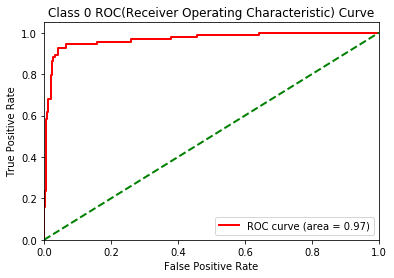

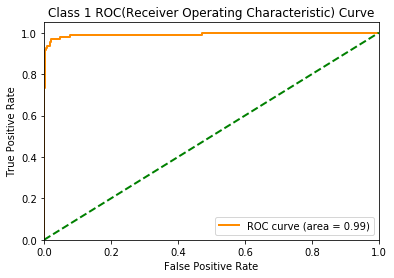

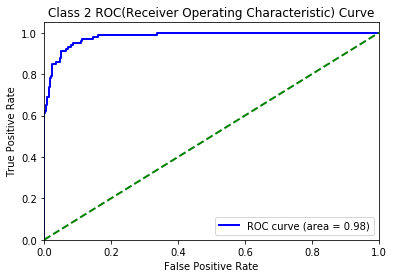

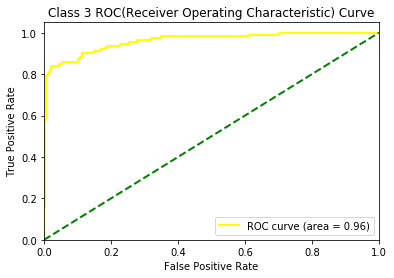

In [0]:
Y_pred = merge_model.predict(X_test)
face_pred=Y_pred[0]
# ROC curve를 그리기 위해 사용되는 함수입니다.
def plot_ROC_curve(fpr, tpr, roc_auc, nth_class):

    plt.figure()
    lw = 2
    
    color_name = ''
    if nth_class == 0:
        color_name = 'red'
    elif nth_class == 1 :
        color_name = 'darkorange'
    elif nth_class == 2 :
        color_name = 'blue'
    else :
        color_name = 'yellow'
        
    plt.plot(fpr[nth_class], tpr[nth_class], color=color_name,
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[nth_class])
    plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class %s ROC(Receiver Operating Characteristic) Curve' %nth_class)
    plt.legend(loc="lower right")
    plt.show()
    
fpr = dict()
tpr = dict()
roc_auc = dict()
#print(y_score)
n_classes=4
    # ROC curve를 사용하여 분류 성능을 확인해 봅시다.
for i in range(n_classes):
        ## 2. roc_curve() 함수에 y_test의 i번째 열, y_score의 i번째 열을 입력 인자로 넣어 fpr[i], tpr[i]의 값을 획득하세요.
        fpr[i], tpr[i] ,_= roc_curve(Y_test_facetype[:,i], face_pred[:,i])

        ## 3. auc() 함수에 fpr[i], tpr[i]를 입력 인자로 넣어 각각의 클래스에서의 ROC & AUC 값을 획득하세요.
        roc_auc[i] = auc(fpr[i], tpr[i])

for nth_class in range(n_classes):
    plot_ROC_curve(fpr, tpr, roc_auc, nth_class)

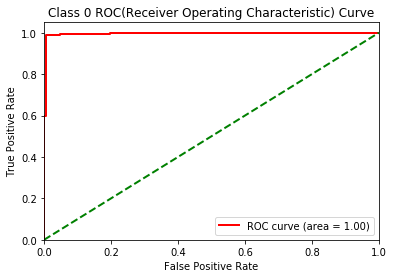

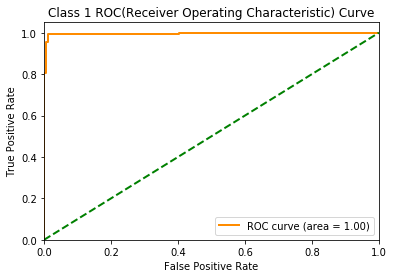

In [0]:
#Y_pred = merge_model.predict(X_test)
sex_pred=Y_pred[1]
# ROC curve를 그리기 위해 사용되는 함수입니다.
def plot_ROC_curve(fpr, tpr, roc_auc, nth_class):

    plt.figure()
    lw = 2
    
    color_name = ''
    if nth_class == 0:
        color_name = 'red'
    elif nth_class == 1 :
        color_name = 'darkorange'
        
    plt.plot(fpr[nth_class], tpr[nth_class], color=color_name,
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[nth_class])
    plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class %s ROC(Receiver Operating Characteristic) Curve' %nth_class)
    plt.legend(loc="lower right")
    plt.show()
    
fpr = dict()
tpr = dict()
roc_auc = dict()
#print(y_score)
n_classes=2
    # ROC curve를 사용하여 분류 성능을 확인해 봅시다.
for i in range(n_classes):
        ## 2. roc_curve() 함수에 y_test의 i번째 열, y_score의 i번째 열을 입력 인자로 넣어 fpr[i], tpr[i]의 값을 획득하세요.
        fpr[i], tpr[i] ,_= roc_curve(Y_test_sex[:,i], sex_pred[:,i])

        ## 3. auc() 함수에 fpr[i], tpr[i]를 입력 인자로 넣어 각각의 클래스에서의 ROC & AUC 값을 획득하세요.
        roc_auc[i] = auc(fpr[i], tpr[i])

for nth_class in range(n_classes):
    plot_ROC_curve(fpr, tpr, roc_auc, nth_class)

In [0]:
print(y_pred)

In [0]:
list=[1,2,3,4,5,6,7]
print(np.argmax(list))
print(np.argmax(Y_test_facetype[0]))
test=Y_test_facetype[:20]
#print(test)
print([np.argmax(i) for i in Y_test_facetype[:20]] )

In [12]:
demo_X=[]
num=5
i=3
while i<=num:
   #img =cv2.imread('./Data/'+csv_file['image_id'].values[i])####################################풀기
  img =cv2.imread('./Colab Notebooks/'+str(i)+ '.jpg')
  demo_X.append(img/256) #셀은 0 ~ 255값을 가집니다. 그리고 학습을 하기엔 0~1사이의 소수가 필요하구요. 그래서 256으로 나누어 주었습니다.
  i+=1
demo_X = np.array(demo_X)
print(demo_X.shape)

(3, 224, 224, 3)


In [0]:
#print(race_X[0])
print(race_X.shape)

In [55]:
y_pred=merge_model.predict(demo_X)
print(y_pred)
#print('Test Data의 실제 클래스   : ',[np.argmax(i) for i in Y_test_facetype[:30]])



[array([[0.2239898 , 0.03359327, 0.07268111, 0.66973585],
       [0.9750225 , 0.00308483, 0.01309692, 0.00879576],
       [0.19680335, 0.5375314 , 0.09222376, 0.17344148]], dtype=float32), array([[4.8881769e-04, 9.9952030e-01],
       [6.3151121e-05, 9.9993914e-01],
       [9.9890053e-01, 1.1387743e-03]], dtype=float32)]


In [53]:
prediction=np.array([[0.048000, 99.952000],
       [0.0010300, 99.99397],
       [99.8900530, 0.1099470]])
print(prediction.shape)
print(type(prediction))
print(prediction[1])

(3, 2)
<class 'numpy.ndarray'>
[1.030000e-03 9.999397e+01]


In [47]:
print(np.argmax(y_pred[1],axis=1))
print(y_pred[1].shape)
print(type(y_pred[1]))

[1 1 0]
(3, 2)
<class 'numpy.ndarray'>


In [57]:
for i in range(len(y_pred[1])):
  y_pred[1][i]*=100
print(y_pred[1])

[[4.8881769e-02 9.9952026e+01]
 [6.3151121e-03 9.9993912e+01]
 [9.9890053e+01 1.1387743e-01]]


In [54]:
print(type(y_pred[0][2]))

<class 'numpy.ndarray'>


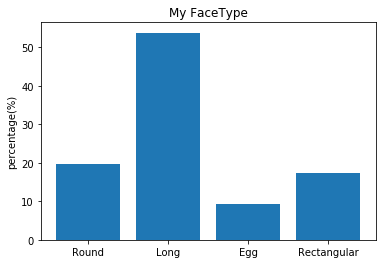

둥근 형일 확률 :19.68033%
긴  형일 확률  : 53.75314%
계란 형일 확률 : 9.22238%
각진 형일 확률 : 17.34415%


In [40]:
face_types = ["Round", "Long", "Egg", "Rectangular"]
 
xs = [i for i, _ in enumerate(face_types)]
plt.bar(xs, y_pred[0][2])
plt.ylabel("percentage(%)")
plt.title("My FaceType")
 
plt.xticks([i for i, _ in enumerate(face_types)], face_types)
 
plt.show()

print("둥근 형일 확률 :" +str(round(y_pred[0][2][0],5))+"%")
print("긴  형일 확률  : "+str(round(y_pred[0][2][1],5))+"%")
print("계란 형일 확률 : "+str(round(y_pred[0][2][2],5))+"%")
print("각진 형일 확률 : "+str(round(y_pred[0][2][3],5))+"%")

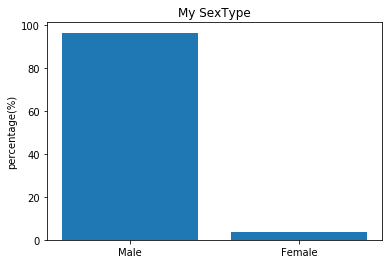

남자일 확률 : 96.43565%
여자일 확률 : 3.56435%


In [60]:
sex_types = ["Male", "Female"]
 
xs = [i for i, _ in enumerate(sex_types)]
plt.bar(xs, [96.43565,3.56435 ])
plt.ylabel("percentage(%)")
plt.title("My SexType")
 
plt.xticks([i for i, _ in enumerate(sex_types)], sex_types)
 
plt.show()
#class_sex=model.predict_classes(demo)
#if(class_sex[0]==0):
  #  sex="남자"
#elif(class_sex[0]==1):
  #  sex="여자"
    
print("남자일 확률 : " +str(96.43565)+"%")
print("여자일 확률 : " +str(3.56435)+"%")

In [35]:
for i in range(len(y_pred[1])):
  y_pred[1][i]*=100
print(y_pred[1])

[[4.8881769e-02 9.9952026e+01]
 [6.3151121e-03 9.9993912e+01]
 [9.9890053e+01 1.1387743e-01]]


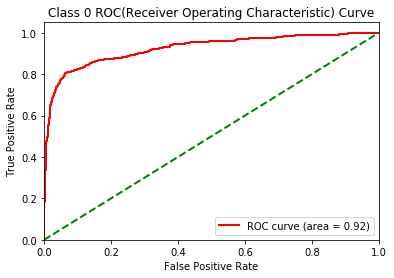

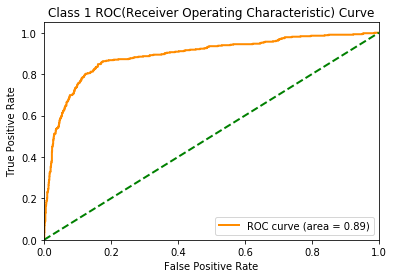

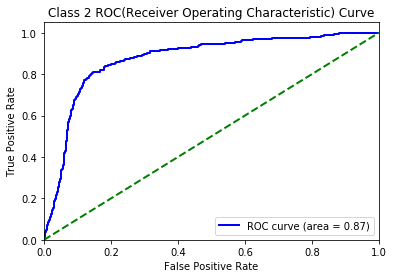

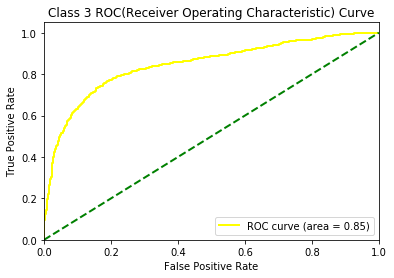

In [0]:
#Y_pred = merge_model.predict(Race_X)
face_pred=y_pred[0]
# ROC curve를 그리기 위해 사용되는 함수입니다.
def plot_ROC_curve(fpr, tpr, roc_auc, nth_class):

    plt.figure()
    lw = 2
    
    color_name = ''
    if nth_class == 0:
        color_name = 'red'
    elif nth_class == 1 :
        color_name = 'darkorange'
    elif nth_class == 2 :
        color_name = 'blue'
    else :
        color_name = 'yellow'
        
    plt.plot(fpr[nth_class], tpr[nth_class], color=color_name,
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[nth_class])
    plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class %s ROC(Receiver Operating Characteristic) Curve' %nth_class)
    plt.legend(loc="lower right")
    plt.show()
    
fpr = dict()
tpr = dict()
roc_auc = dict()
#print(y_score)
n_classes=4
    # ROC curve를 사용하여 분류 성능을 확인해 봅시다.
for i in range(n_classes):
        ## 2. roc_curve() 함수에 y_test의 i번째 열, y_score의 i번째 열을 입력 인자로 넣어 fpr[i], tpr[i]의 값을 획득하세요.
        fpr[i], tpr[i] ,_= roc_curve(Race_Y_faceType[:,i], face_pred[:,i])

        ## 3. auc() 함수에 fpr[i], tpr[i]를 입력 인자로 넣어 각각의 클래스에서의 ROC & AUC 값을 획득하세요.
        roc_auc[i] = auc(fpr[i], tpr[i])

for nth_class in range(n_classes):
    plot_ROC_curve(fpr, tpr, roc_auc, nth_class)

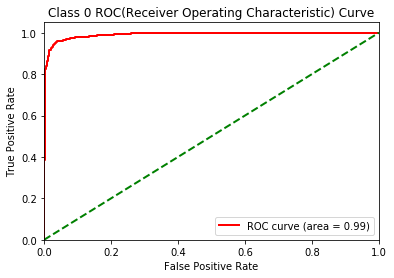

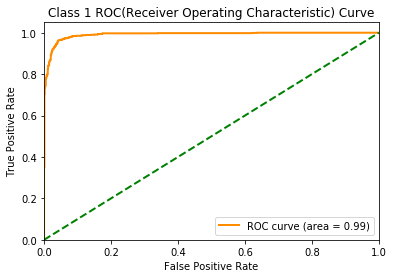

In [0]:
#Y_pred = merge_model.predict(X_test)
sex_pred=y_pred[1]
# ROC curve를 그리기 위해 사용되는 함수입니다.
def plot_ROC_curve(fpr, tpr, roc_auc, nth_class):

    plt.figure()
    lw = 2
    
    color_name = ''
    if nth_class == 0:
        color_name = 'red'
    elif nth_class == 1 :
        color_name = 'darkorange'
        
    plt.plot(fpr[nth_class], tpr[nth_class], color=color_name,
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[nth_class])
    plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class %s ROC(Receiver Operating Characteristic) Curve' %nth_class)
    plt.legend(loc="lower right")
    plt.show()
    
fpr = dict()
tpr = dict()
roc_auc = dict()
#print(y_score)
n_classes=2
    # ROC curve를 사용하여 분류 성능을 확인해 봅시다.
for i in range(n_classes):
        ## 2. roc_curve() 함수에 y_test의 i번째 열, y_score의 i번째 열을 입력 인자로 넣어 fpr[i], tpr[i]의 값을 획득하세요.
        fpr[i], tpr[i] ,_= roc_curve(Race_Y_sex[:,i], sex_pred[:,i])

        ## 3. auc() 함수에 fpr[i], tpr[i]를 입력 인자로 넣어 각각의 클래스에서의 ROC & AUC 값을 획득하세요.
        roc_auc[i] = auc(fpr[i], tpr[i])

for nth_class in range(n_classes):
    plot_ROC_curve(fpr, tpr, roc_auc, nth_class)

In [0]:
print(type(y_pred[0]))
print(len(y_pred))
print(len(y_pred[0]))
print(y_pred[0][0])
print(y_pred[1][0])
print(y_pred)
#print(y_pred.shape)
#y_pred=np.array(y_pred[0])
#print(y_pred.shape)
race_predict_facetype=np.argmax(y_pred[0],axis=1)
print(race_predict_facetype.shape)
race_predict_sex=np.argmax(y_pred[1],axis=1)
print(race_predict_sex.shape)
print(race_predict_facetype[:1000])
  

<class 'numpy.ndarray'>
2
2000
[6.0259394e-02 2.2813279e-04 3.4194405e-04 9.3917048e-01]
[0.9975736  0.00268278]
[array([[6.0259394e-02, 2.2813279e-04, 3.4194405e-04, 9.3917048e-01],
       [9.9724603e-01, 4.7826642e-04, 5.8350656e-06, 2.2698867e-03],
       [9.9915087e-01, 1.9624796e-04, 1.4315164e-04, 5.0967309e-04],
       ...,
       [3.1588620e-01, 3.2738819e-07, 2.5767029e-05, 6.8408775e-01],
       [9.9795604e-01, 1.2682499e-04, 8.4903790e-04, 1.0681263e-03],
       [9.4123834e-01, 4.2250147e-03, 5.1849384e-02, 2.6872517e-03]],
      dtype=float32), array([[9.9757361e-01, 2.6827753e-03],
       [9.3155777e-01, 7.1498126e-02],
       [9.9655581e-01, 3.6378503e-03],
       ...,
       [1.0000000e+00, 0.0000000e+00],
       [9.8576224e-01, 1.4713407e-02],
       [9.9999928e-01, 7.7486038e-07]], dtype=float32)]
(2000,)
(2000,)
[3 0 0 3 1 2 1 1 3 3 2 1 1 1 3 3 0 2 1 1 2 1 1 0 2 0 1 3 1 2 1 1 1 1 0 3 0
 1 3 2 1 2 2 3 1 0 2 1 2 3 3 3 0 1 3 3 0 1 1 3 0 2 2 0 2 0 2 2 3 1 1 0 3 3
 1 2 2 1

In [0]:
count1_0=0
count2_0=0
count3_0=0
count4_0=0
count1_1=0
count2_1=0
count3_1=0
count4_1=0
for i in range(2000):
  if race_predict_facetype[i]==0:
    if Race_Y_race[i]==0:
      count1_0+=1
    else:
      count1_1+=1
  elif race_predict_facetype[i]==1:
    if Race_Y_race[i]==0:
      count2_0+=1
    else:
      count2_1+=1
  elif race_predict_facetype[i]==2:
    if Race_Y_race[i]==0:
      count3_0+=1
    else:
      count3_1+=1
  elif race_predict_facetype[i]==3:
    if Race_Y_race[i]==0:
      count4_0+=1
    else:
      count4_1+=1
    
print(count1_0,count2_0,count3_0,count4_0,count1_1,count2_1,count3_1,count4_1)
    

288 105 380 227 80 433 127 360


In [0]:
count1_0=0
count2_0=0
count3_0=0
count4_0=0

for i in range(2000):
  if race_predict_facetype[i]==0:
     count1_0+=1
  elif race_predict_facetype[i]==1:
     count2_0+=1
  elif race_predict_facetype[i]==2:
     count3_0+=1
  elif race_predict_facetype[i]==3:
     count4_0+=1
    
print(count1_0,count2_0,count3_0,count4_0)

368 538 507 587


In [0]:
Race_Y_race = np.load('./Colab Notebooks/Race_Y_race.npy')

In [0]:
print(Race_Y_race[0:1000])

[0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0
 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0
 1 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1
 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0
 0 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1
 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0
 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0
 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1
 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0
 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0
 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 0 1 

In [0]:
predictions = model.predict(X_test[:30])
print(predictions[25])
csv_file['image_id'].values[1625]

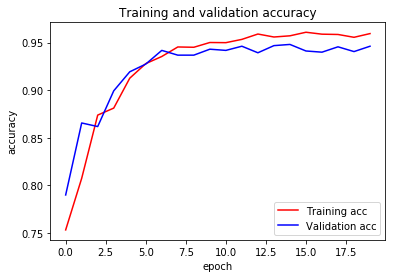

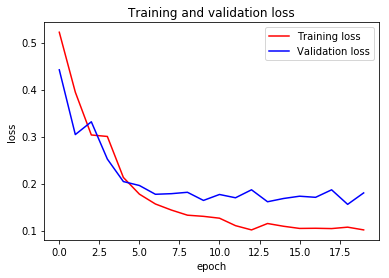

In [0]:
#얼굴형 loss 및 accuracy
acc = history.history['facetype_output_acc']
val_acc = history.history['val_facetype_output_acc']
loss = history.history['facetype_output_loss']
val_loss = history.history['val_facetype_output_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

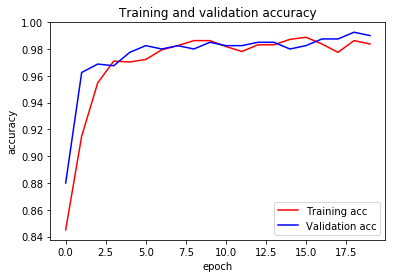

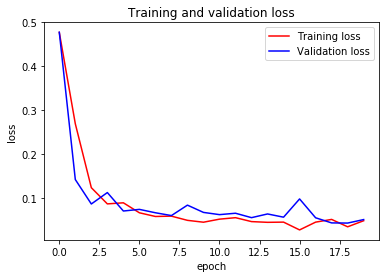

In [0]:
#성별 loss 및 accuracy
acc = history.history['sextype_output_acc']
val_acc = history.history['val_sextype_output_acc']
loss = history.history['sextype_output_loss']
val_loss = history.history['val_sextype_output_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

In [0]:
#Graphing our training and validation
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

In [0]:
print(history.history)

{'loss': [0.9631849670410156, 0.5455604553222656, 0.3826353406906128, 0.3253465521335602, 0.2492518901824951, 0.21922619998455048, 0.2019392454624176, 0.18216562449932097, 0.1990797984600067, 0.17838861107826232, 0.17034388542175294, 0.15953598380088807, 0.17520566582679747, 0.15248477816581726, 0.14765917003154755, 0.14765142589807512, 0.13817238450050354, 0.1399312996864319, 0.12547472149133682, 0.12918545484542845], 'facetype_output_loss': [0.5308773, 0.39081097, 0.3060815, 0.25261936, 0.19149105, 0.15339394, 0.1506702, 0.14203468, 0.14942336, 0.1457042, 0.12931347, 0.12906429, 0.12857823, 0.11933933, 0.11155701, 0.09704957, 0.10386574, 0.10131471, 0.094273366, 0.100304976], 'sextype_output_loss': [0.3941132, 0.14156954, 0.08319967, 0.072558515, 0.051405936, 0.056711946, 0.053445954, 0.035635624, 0.049544044, 0.037190348, 0.042509686, 0.035247978, 0.047295008, 0.032057934, 0.04324711, 0.04044366, 0.036305267, 0.03582124, 0.029133907, 0.04324496], 'facetype_output_acc': [0.7604687, 0